# Section to delete

In [1]:
# # Calcular a correlação entre as colunas e a variável resposta
# corr = df_raw_train.corr(method='pearson')['TARGET']

# # Classificar as colunas com base na correlação
# corr = corr.sort_values(ascending=False)

# # Selecionar as colunas de maior correlação
# # top_corr = corr[corr > 0.5]

# # Imprimir as colunas de maior correlação
# print(corr)

In [2]:
# df_raw_train

# Imports

## Libs

In [75]:
import pandas                  as pd
import numpy                   as np

import seaborn                 as sns
from matplotlib  import pyplot as plt

## Helper functions


## Loading data

In [4]:
df_raw_train = pd.read_csv('/home/eduardo/Desktop/DS/granting-of-credit/datasets/credit_01/train')
df_raw_test  = pd.read_csv('/home/eduardo/Desktop/DS/granting-of-credit/datasets/credit_01/test', low_memory=False)
df_raw_oot   = pd.read_csv('/home/eduardo/Desktop/DS/granting-of-credit/datasets/credit_01/oot', low_memory=False)

## Saving id to split later

In [5]:
id_of_train = df_raw_train['ID'].to_list()
id_of_test  = df_raw_test['ID'].to_list()

# Data description

- Vou preferir por não fazer a junção das tabelas pois quero ver a estatistíca descritiva de cada uma delas separada

In [6]:
df1_oot   = df_raw_oot.copy()
df1_train = df_raw_train.copy()
df1_test  = df_raw_test.copy()

## Data dimensions

In [7]:
print( 'number of Rows of train dataset: {}'.format( df1_train.shape[0] ) )
print( 'number of columns of test dataset: {}'.format( df1_train.shape[1] ) )

number of Rows of train dataset: 101128
number of columns of test dataset: 151


In [8]:
print( 'number of Rows of test dataset: {}'.format( df1_test.shape[0] ) )
print( 'number of columns of test dataset: {}'.format( df1_test.shape[1] ) )

number of Rows of test dataset: 49810
number of columns of test dataset: 151


In [9]:
print( 'number of Rows of oot dataset: {}'.format( df1_oot.shape[0] ) )
print( 'number of columns of test dataset: {}'.format( df1_oot.shape[1] ) )

number of Rows of oot dataset: 80469
number of columns of test dataset: 150


## Data types

Aqui percebemos que a maioria dos colunas não estão como tipo object, vamos ter que analisar posteriormente como fazer o encoding **correto** nas colunas que vão ser suficientemente influentes na variável resposta

In [10]:
df1_train.dtypes

REF_DATE     object
TARGET        int64
VAR2         object
IDADE       float64
VAR4         object
             ...   
VAR146      float64
VAR147        int64
VAR148       object
VAR149       object
ID            int64
Length: 151, dtype: object

In [11]:
# Obtendo as colunas do tipo int
int_cols = df1_train.select_dtypes(include='int64').columns
print(int_cols)
print('\n' *2)

# Obtendo as colunas do tipo float
float_cols = df1_train.select_dtypes(include='float64').columns
print(float_cols)
print('\n' *2)

# Obtendo as colunas do tipo object
obj_cols = df1_train.select_dtypes(include='object').columns
print(obj_cols)
print('\n' *2)

Index(['TARGET', 'VAR147', 'ID'], dtype='object')



Index(['IDADE', 'VAR6', 'VAR7', 'VAR11', 'VAR12', 'VAR13', 'VAR14', 'VAR15',
       'VAR16', 'VAR17', 'VAR18', 'VAR19', 'VAR20', 'VAR21', 'VAR22', 'VAR23',
       'VAR24', 'VAR25', 'VAR26', 'VAR27', 'VAR28', 'VAR29', 'VAR30', 'VAR37',
       'VAR39', 'VAR40', 'VAR41', 'VAR42', 'VAR44', 'VAR46', 'VAR47', 'VAR141',
       'VAR145', 'VAR146'],
      dtype='object')



Index(['REF_DATE', 'VAR2', 'VAR4', 'VAR5', 'VAR8', 'VAR9', 'VAR10', 'VAR31',
       'VAR32', 'VAR33',
       ...
       'VAR136', 'VAR137', 'VAR138', 'VAR139', 'VAR140', 'VAR142', 'VAR143',
       'VAR144', 'VAR148', 'VAR149'],
      dtype='object', length=114)





In [12]:
print(f"Tem outro tipo de dado no conjunto que não seja [int,float,object]? \nresposta: {False if (len(int_cols.to_list()) + len(float_cols.to_list()) + len(obj_cols.to_list())) == df1_train.shape[1] else True}" )

Tem outro tipo de dado no conjunto que não seja [int,float,object]? 
resposta: False


## Check NAN

In [13]:
missing_cols = df1_train.columns[df1_train.isnull().any()]

missing_cols.to_list()

['VAR2',
 'IDADE',
 'VAR4',
 'VAR5',
 'VAR6',
 'VAR7',
 'VAR8',
 'VAR9',
 'VAR10',
 'VAR11',
 'VAR12',
 'VAR13',
 'VAR14',
 'VAR15',
 'VAR16',
 'VAR17',
 'VAR18',
 'VAR19',
 'VAR20',
 'VAR21',
 'VAR22',
 'VAR23',
 'VAR24',
 'VAR25',
 'VAR26',
 'VAR27',
 'VAR28',
 'VAR29',
 'VAR30',
 'VAR31',
 'VAR32',
 'VAR33',
 'VAR34',
 'VAR35',
 'VAR36',
 'VAR37',
 'VAR38',
 'VAR39',
 'VAR40',
 'VAR41',
 'VAR42',
 'VAR43',
 'VAR44',
 'VAR45',
 'VAR46',
 'VAR48',
 'VAR49',
 'VAR50',
 'VAR51',
 'VAR52',
 'VAR53',
 'VAR54',
 'VAR55',
 'VAR56',
 'VAR57',
 'VAR58',
 'VAR59',
 'VAR60',
 'VAR61',
 'VAR62',
 'VAR63',
 'VAR64',
 'VAR65',
 'VAR66',
 'VAR67',
 'VAR68',
 'VAR69',
 'VAR70',
 'VAR71',
 'VAR72',
 'VAR73',
 'VAR74',
 'VAR75',
 'VAR76',
 'VAR77',
 'VAR78',
 'VAR79',
 'VAR80',
 'VAR81',
 'VAR82',
 'VAR83',
 'VAR84',
 'VAR85',
 'VAR86',
 'VAR87',
 'VAR88',
 'VAR89',
 'VAR90',
 'VAR91',
 'VAR92',
 'VAR93',
 'VAR94',
 'VAR95',
 'VAR96',
 'VAR97',
 'VAR98',
 'VAR99',
 'VAR100',
 'VAR101',
 'VAR102',
 'VA

In [14]:
df1_train.isna().sum().to_dict()

{'REF_DATE': 0,
 'TARGET': 0,
 'VAR2': 12356,
 'IDADE': 11594,
 'VAR4': 100944,
 'VAR5': 2835,
 'VAR6': 2835,
 'VAR7': 2835,
 'VAR8': 44526,
 'VAR9': 2798,
 'VAR10': 2770,
 'VAR11': 38719,
 'VAR12': 46220,
 'VAR13': 88133,
 'VAR14': 21411,
 'VAR15': 52173,
 'VAR16': 63551,
 'VAR17': 88133,
 'VAR18': 21411,
 'VAR19': 52173,
 'VAR20': 91606,
 'VAR21': 88081,
 'VAR22': 52106,
 'VAR23': 88133,
 'VAR24': 19685,
 'VAR25': 52173,
 'VAR26': 100307,
 'VAR27': 100281,
 'VAR28': 90386,
 'VAR29': 80376,
 'VAR30': 90386,
 'VAR31': 97881,
 'VAR32': 65931,
 'VAR33': 93800,
 'VAR34': 93800,
 'VAR35': 79486,
 'VAR36': 80339,
 'VAR37': 80339,
 'VAR38': 100467,
 'VAR39': 65,
 'VAR40': 2782,
 'VAR41': 2508,
 'VAR42': 11588,
 'VAR43': 100778,
 'VAR44': 100778,
 'VAR45': 100867,
 'VAR46': 100867,
 'VAR47': 0,
 'VAR48': 94081,
 'VAR49': 11592,
 'VAR50': 11592,
 'VAR51': 11592,
 'VAR52': 11592,
 'VAR53': 11592,
 'VAR54': 11592,
 'VAR55': 11592,
 'VAR56': 11592,
 'VAR57': 11592,
 'VAR58': 11592,
 'VAR59': 1159

In [15]:
missing_cols = df1_test.columns[df1_test.isnull().any()]

missing_cols.to_list()

['VAR2',
 'IDADE',
 'VAR4',
 'VAR5',
 'VAR6',
 'VAR7',
 'VAR8',
 'VAR9',
 'VAR10',
 'VAR11',
 'VAR12',
 'VAR13',
 'VAR14',
 'VAR15',
 'VAR16',
 'VAR17',
 'VAR18',
 'VAR19',
 'VAR20',
 'VAR21',
 'VAR22',
 'VAR23',
 'VAR24',
 'VAR25',
 'VAR26',
 'VAR27',
 'VAR28',
 'VAR29',
 'VAR30',
 'VAR31',
 'VAR32',
 'VAR33',
 'VAR34',
 'VAR35',
 'VAR36',
 'VAR37',
 'VAR38',
 'VAR39',
 'VAR40',
 'VAR41',
 'VAR42',
 'VAR43',
 'VAR44',
 'VAR45',
 'VAR46',
 'VAR48',
 'VAR49',
 'VAR50',
 'VAR51',
 'VAR52',
 'VAR53',
 'VAR54',
 'VAR55',
 'VAR56',
 'VAR57',
 'VAR58',
 'VAR59',
 'VAR60',
 'VAR61',
 'VAR62',
 'VAR63',
 'VAR64',
 'VAR65',
 'VAR66',
 'VAR67',
 'VAR68',
 'VAR69',
 'VAR70',
 'VAR71',
 'VAR72',
 'VAR73',
 'VAR74',
 'VAR75',
 'VAR76',
 'VAR77',
 'VAR78',
 'VAR79',
 'VAR80',
 'VAR81',
 'VAR82',
 'VAR83',
 'VAR84',
 'VAR85',
 'VAR86',
 'VAR87',
 'VAR88',
 'VAR89',
 'VAR90',
 'VAR91',
 'VAR92',
 'VAR93',
 'VAR94',
 'VAR95',
 'VAR96',
 'VAR97',
 'VAR98',
 'VAR99',
 'VAR100',
 'VAR101',
 'VAR102',
 'VA

In [16]:
df1_test.isna().sum().to_dict()

{'REF_DATE': 0,
 'TARGET': 0,
 'VAR2': 6032,
 'IDADE': 5602,
 'VAR4': 49734,
 'VAR5': 1345,
 'VAR6': 1345,
 'VAR7': 1345,
 'VAR8': 21922,
 'VAR9': 1335,
 'VAR10': 1323,
 'VAR11': 19049,
 'VAR12': 22771,
 'VAR13': 43376,
 'VAR14': 10670,
 'VAR15': 25670,
 'VAR16': 31268,
 'VAR17': 43376,
 'VAR18': 10670,
 'VAR19': 25670,
 'VAR20': 45101,
 'VAR21': 43347,
 'VAR22': 25649,
 'VAR23': 43376,
 'VAR24': 9772,
 'VAR25': 25670,
 'VAR26': 49417,
 'VAR27': 49408,
 'VAR28': 44556,
 'VAR29': 39570,
 'VAR30': 44556,
 'VAR31': 48194,
 'VAR32': 32569,
 'VAR33': 46208,
 'VAR34': 46208,
 'VAR35': 39015,
 'VAR36': 39451,
 'VAR37': 39451,
 'VAR38': 49510,
 'VAR39': 42,
 'VAR40': 1326,
 'VAR41': 1194,
 'VAR42': 5600,
 'VAR43': 49623,
 'VAR44': 49623,
 'VAR45': 49667,
 'VAR46': 49667,
 'VAR47': 0,
 'VAR48': 46377,
 'VAR49': 5601,
 'VAR50': 5601,
 'VAR51': 5601,
 'VAR52': 5601,
 'VAR53': 5601,
 'VAR54': 5601,
 'VAR55': 5601,
 'VAR56': 5601,
 'VAR57': 5601,
 'VAR58': 5601,
 'VAR59': 5601,
 'VAR60': 5601,
 'VA

In [17]:
missing_cols = df1_train.columns[df1_test.isnull().any()]

missing_cols.to_list()

['VAR2',
 'IDADE',
 'VAR4',
 'VAR5',
 'VAR6',
 'VAR7',
 'VAR8',
 'VAR9',
 'VAR10',
 'VAR11',
 'VAR12',
 'VAR13',
 'VAR14',
 'VAR15',
 'VAR16',
 'VAR17',
 'VAR18',
 'VAR19',
 'VAR20',
 'VAR21',
 'VAR22',
 'VAR23',
 'VAR24',
 'VAR25',
 'VAR26',
 'VAR27',
 'VAR28',
 'VAR29',
 'VAR30',
 'VAR31',
 'VAR32',
 'VAR33',
 'VAR34',
 'VAR35',
 'VAR36',
 'VAR37',
 'VAR38',
 'VAR39',
 'VAR40',
 'VAR41',
 'VAR42',
 'VAR43',
 'VAR44',
 'VAR45',
 'VAR46',
 'VAR48',
 'VAR49',
 'VAR50',
 'VAR51',
 'VAR52',
 'VAR53',
 'VAR54',
 'VAR55',
 'VAR56',
 'VAR57',
 'VAR58',
 'VAR59',
 'VAR60',
 'VAR61',
 'VAR62',
 'VAR63',
 'VAR64',
 'VAR65',
 'VAR66',
 'VAR67',
 'VAR68',
 'VAR69',
 'VAR70',
 'VAR71',
 'VAR72',
 'VAR73',
 'VAR74',
 'VAR75',
 'VAR76',
 'VAR77',
 'VAR78',
 'VAR79',
 'VAR80',
 'VAR81',
 'VAR82',
 'VAR83',
 'VAR84',
 'VAR85',
 'VAR86',
 'VAR87',
 'VAR88',
 'VAR89',
 'VAR90',
 'VAR91',
 'VAR92',
 'VAR93',
 'VAR94',
 'VAR95',
 'VAR96',
 'VAR97',
 'VAR98',
 'VAR99',
 'VAR100',
 'VAR101',
 'VAR102',
 'VA

In [18]:
df1_oot.isna().sum().to_dict()

{'REF_DATE': 0,
 'VAR2': 5876,
 'IDADE': 5188,
 'VAR4': 80326,
 'VAR5': 2559,
 'VAR6': 2559,
 'VAR7': 2559,
 'VAR8': 33534,
 'VAR9': 2521,
 'VAR10': 2496,
 'VAR11': 31119,
 'VAR12': 34113,
 'VAR13': 69820,
 'VAR14': 17435,
 'VAR15': 41162,
 'VAR16': 43853,
 'VAR17': 69820,
 'VAR18': 17435,
 'VAR19': 41162,
 'VAR20': 72893,
 'VAR21': 69788,
 'VAR22': 41127,
 'VAR23': 69820,
 'VAR24': 15944,
 'VAR25': 41162,
 'VAR26': 79425,
 'VAR27': 79297,
 'VAR28': 69807,
 'VAR29': 60806,
 'VAR30': 69807,
 'VAR31': 78098,
 'VAR32': 53208,
 'VAR33': 74689,
 'VAR34': 74689,
 'VAR35': 61404,
 'VAR36': 62124,
 'VAR37': 62124,
 'VAR38': 79983,
 'VAR39': 71,
 'VAR40': 2505,
 'VAR41': 2296,
 'VAR42': 5180,
 'VAR43': 80195,
 'VAR44': 80195,
 'VAR45': 80317,
 'VAR46': 80317,
 'VAR47': 0,
 'VAR48': 74911,
 'VAR49': 5198,
 'VAR50': 5198,
 'VAR51': 5198,
 'VAR52': 5198,
 'VAR53': 5198,
 'VAR54': 5198,
 'VAR55': 5198,
 'VAR56': 5198,
 'VAR57': 5198,
 'VAR58': 5198,
 'VAR59': 5198,
 'VAR60': 5198,
 'VAR61': 5198,
 

## Fillout NAN 

- Até aqui vimos que temos diversos casos com valores faltantes, então vamos ter que adotar uma estratégia para conseguir digerir a informação dessas colunas 
    
    
- A estratégia vai ser excluir as colunas que tem mais de 20% das linhas como NaN, escolhi esse numero pois na literatura é bem usado 
    - Acaba que nesse processo perdi algumas colunas que eu tinha a semântica clara, como a da informação do partido, mas deixar elas é perigoso pois preenchendo os muitos dados vazios que tem pode ser que o modelo na realidade aprenda errado


- Vou olhar só para essa relação no dataset de treino, pois não faz sentido analisar para os outros(oot, test) se o modelo não tem dados suficientes para treinar com o conjunto de treino 

In [19]:
cols_to_drop = []

dict_analysis = df1_train.isna().sum().to_dict()

for col_name, qnt_nan in dict_analysis.items():
    if qnt_nan > (df1_train.shape[0]*0.2):
        cols_to_drop.append(col_name)
    

In [20]:
cols_to_drop

['VAR4',
 'VAR8',
 'VAR11',
 'VAR12',
 'VAR13',
 'VAR14',
 'VAR15',
 'VAR16',
 'VAR17',
 'VAR18',
 'VAR19',
 'VAR20',
 'VAR21',
 'VAR22',
 'VAR23',
 'VAR25',
 'VAR26',
 'VAR27',
 'VAR28',
 'VAR29',
 'VAR30',
 'VAR31',
 'VAR32',
 'VAR33',
 'VAR34',
 'VAR35',
 'VAR36',
 'VAR37',
 'VAR38',
 'VAR43',
 'VAR44',
 'VAR45',
 'VAR46',
 'VAR48',
 'VAR143',
 'VAR144',
 'VAR145',
 'VAR146']

In [21]:
df1_train.drop(columns=cols_to_drop, inplace=True, axis=1)
df1_test.drop(columns =cols_to_drop, inplace=True, axis=1)
df1_oot.drop(columns  =cols_to_drop, inplace=True, axis=1)

In [22]:
print( 'number of columns of test dataset: {}'.format( df1_train.shape[1] ) )

number of columns of test dataset: 113


- Agora reduzimos as colunas que temos para trabalhar de 150 para 112


- Vamos agora prencher as linhas faltantes com o metodo de ffill, mas antes precisamos ver quais ainda estão com dados faltantes
    - Esse metodo de preenchimento de valores de dados faltantes repete o valor imediantamente posterior a ele naquela coluna 

In [23]:
df1_train.fillna(method='ffill', inplace=True)
df1_test.fillna(method='ffill', inplace=True)
df1_oot.fillna(method='ffill', inplace=True)

## Rename Columns

- Inicialmente, vamos analisar coluna por coluna para ver se identificamos um padrão que possa ser importante para nós na hora de fazermos o encoding 
    - O ordinal encoding, por exemplo, vai funcionar muito bem com as colunas que tiverem com o conjunto de valores possiveis iguais a ['ALTISSIMA', 'BAIXISSIMA', 'ALTA'], pois vai manter a relação altissima>alta>baixissima (assim como as colunas que temos ['MEDIO' 'LONGE' 'PROXIMO' 'MUITO LONGE' 'MUITO PROXIMO'] )
    - O label encoding é ideal para usarmos nas colunas que tem o conjunto de valores ['S','N'].


- Isso vai ajudar bastante pois não precisamos saber o que a coluna significa. O papel do cientista de dados é treinar o modelo da melhor forma viável, com os dados que tem no momento(se forem suficientes, claro).


- Esse processo inteiro não vou deixar documentado aqui para não ficarmos com diversos snippets que poluirão a visualização do notebook


- Depois vou renomeando as que conseguir identificar 


In [65]:
analysis = df1_train.iloc[:,4]

print(analysis.dropna(axis=0).unique())

print(f'\n\n{analysis}')

print(f'\n\n{list(float_cols)+list(int_cols)}')

['SP' 'PE' 'AM' 'AC' 'PA' 'PB' 'MA' 'TO' 'RN' 'MS' 'MG' 'BA' 'RJ' 'CE'
 'PR' 'PI' 'AP' 'GO' 'RS' 'AL' 'ES' 'MT' 'RO' 'SC' 'RR' 'SE' 'DF']


0         SP
1         SP
2         PE
3         AM
4         AC
          ..
101123    PI
101124    MG
101125    PR
101126    BA
101127    SP
Name: LABEL1, Length: 101128, dtype: object


['IDADE', 'VAR6', 'VAR7', 'VAR11', 'VAR12', 'VAR13', 'VAR14', 'VAR15', 'VAR16', 'VAR17', 'VAR18', 'VAR19', 'VAR20', 'VAR21', 'VAR22', 'VAR23', 'VAR24', 'VAR25', 'VAR26', 'VAR27', 'VAR28', 'VAR29', 'VAR30', 'VAR37', 'VAR39', 'VAR40', 'VAR41', 'VAR42', 'VAR44', 'VAR46', 'VAR47', 'VAR141', 'VAR145', 'VAR146', 'TARGET', 'VAR147', 'ID']


In [25]:
append_ordinal = list(range(32,107))
cols_enc_ordinal = [8] # ordinal encoding 
cols_enc_ordinal = cols_enc_ordinal + append_ordinal

append_label = list(range(15,32))
cols_enc_label = [2,4,7,108,110,111] # label encoding
cols_enc_label = cols_enc_label + append_label

cols_numeric = [5,6,9,10,11,12,13,14,107,109]

- Agora, o vou renomear apenas as colunas para os nomes do encoding que vou fazer posteriormente

In [26]:
for passo, numero_coluna in enumerate(cols_enc_ordinal):
    df1_train.rename(columns={df1_train.columns[numero_coluna]: f'ORDINAL{passo}'}, inplace=True)
    
for passo, numero_coluna in enumerate(cols_enc_label):
    df1_train.rename(columns={df1_train.columns[numero_coluna]: f'LABEL{passo}'}, inplace=True)
    
for passo, numero_coluna in enumerate(cols_numeric):
    df1_train.rename(columns={df1_train.columns[numero_coluna]: f'NUMERIC{passo}'}, inplace=True)

In [27]:
for passo, numero_coluna in enumerate(cols_enc_ordinal):
    df1_test.rename(columns={df1_test.columns[numero_coluna]: f'ORDINAL{passo}'}, inplace=True)
    
for passo, numero_coluna in enumerate(cols_enc_label):
    df1_test.rename(columns={df1_test.columns[numero_coluna]: f'LABEL{passo}'}, inplace=True)
    
for passo, numero_coluna in enumerate(cols_numeric):
    df1_test.rename(columns={df1_test.columns[numero_coluna]: f'NUMERIC{passo}'}, inplace=True)

In [28]:
for passo, numero_coluna in enumerate(cols_enc_ordinal):
    df1_oot.rename(columns={df1_oot.columns[numero_coluna]: f'ORDINAL{passo}'}, inplace=True)
    
for passo, numero_coluna in enumerate(cols_enc_label):
    df1_oot.rename(columns={df1_oot.columns[numero_coluna]: f'LABEL{passo}'}, inplace=True)
    
for passo, numero_coluna in enumerate(cols_numeric):
    df1_oot.rename(columns={df1_oot.columns[numero_coluna]: f'NUMERIC{passo}'}, inplace=True)

- Depois disso, vou renomear algumas colunas que consegui identificar sua clara semântica 

In [66]:
df1_train.rename(columns={df1_train.columns[110]: 'SITUACAO'}, inplace=True)
df1_train.rename(columns={df1_train.columns[111]: 'VERSAO'}, inplace=True)
df1_train.rename(columns={df1_train.columns[4]: 'ESTADO'}, inplace=True)

In [67]:
df1_test.rename(columns={df1_test.columns[110]: 'SITUACAO'}, inplace=True)
df1_test.rename(columns={df1_test.columns[111]: 'VERSAO'}, inplace=True)
df1_test.rename(columns={df1_test.columns[4]: 'ESTADO'}, inplace=True)

In [68]:
df1_oot.rename(columns={df1_oot.columns[110]: 'SITUACAO'}, inplace=True)
df1_oot.rename(columns={df1_oot.columns[111]: 'VERSAO'}, inplace=True)
df1_oot.rename(columns={df1_oot.columns[4]: 'ESTADO'}, inplace=True)

## Change types

- Vejo necessidade apenas de mudar agora a coluna 'REF_DATE' pois ela ainda está como object


- As outras eu não identifiquei nenhum tipo específico para ser mudado diante mão

In [38]:
df1_train['REF_DATE'] = pd.to_datetime(df1_train['REF_DATE'], errors='coerce')

In [46]:
df1_test['REF_DATE'] = pd.to_datetime(df1_test['REF_DATE'], errors='coerce')

In [47]:
df1_oot['REF_DATE'] = pd.to_datetime(df1_oot['REF_DATE'], errors='coerce')

In [45]:
df1_train['REF_DATE'].dtypes

datetime64[ns, UTC]

## Descriptive statistical

- Como uma primeira abordagem, vou apenas fazer uma analise do dataset de treino, se sentir a necessidade posteriormente, posso fazer dos outros dois conjunto de dados 

In [69]:
num_attributes = df1_train.select_dtypes( include=['int64', 'float64'] )
cat_attributes = df1_train.select_dtypes( exclude=['int64', 'float64', 'datetime64[ns]'] )

### Numerical attributes

In [70]:
# Central Tendency -  mean, median
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T

# Dispersion - std, min, max, range, skev, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T # Esse T é para uma vermos melhor o dataset
d2 = pd.DataFrame( num_attributes.apply( min ) ).T # Esse T é para uma vermos melhor o dataset
d3 = pd.DataFrame( num_attributes.apply( max ) ).T # Esse T é para uma vermos melhor o dataset
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T # Esse T é para uma vermos melhor o dataset
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T # Esse T é para uma vermos melhor o dataset
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis ) ).T # Esse T é para uma vermos melhor o dataset

# concatenate
dfDesc = pd.concat( [ d2, d3, d4, ct1, ct2, d1, d5, d4 ] ).T.reset_index()

dfDesc.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']

In [71]:
dfDesc

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,TARGET,0.000000,1.000000,1.000000,0.792362,1.000000,0.405616,-1.441592,1.000000
1,IDADE,18.014000,106.904000,88.890000,42.170736,39.890000,15.271359,0.495378,88.890000
2,NUMERIC0,-33.521563,4.478585,38.000148,-14.427593,-13.035421,8.991930,-0.060939,38.000148
3,NUMERIC1,-72.900276,-32.429516,40.470759,-45.901102,-46.576816,7.515403,-0.671684,40.470759
4,NUMERIC2,0.000000,1.000000,1.000000,0.080188,0.034000,0.138874,3.668971,1.000000
5,NUMERIC3,0.049309,0.970921,0.921612,0.461239,0.462267,0.144179,-0.087250,0.921612
6,NUMERIC4,0.208688,0.920685,0.711997,0.531783,0.510313,0.115869,1.047010,0.711997
7,NUMERIC5,0.000000,1.000000,1.000000,0.631528,0.542108,0.222548,0.354275,1.000000
8,NUMERIC6,0.012339,0.910865,0.898526,0.504661,0.496036,0.069690,0.973144,0.898526
9,NUMERIC7,0.000000,1.000000,1.000000,0.256144,0.003000,0.406335,1.167098,1.000000


- Percebemos algumas coisas que pontuo interessante nessa analise do conjunto de treino
    - Temos muito mais bons pagadores do que mal pagadores
    - Geralmente as pessoas que requerem credito tem em torno de 40 anos
    - Provavelmente a NUMERIC8 é uma variável relacionado com alguma metrica de valor monetário

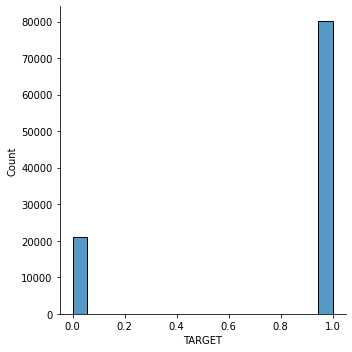

In [72]:
sns.displot( df1_train['TARGET'] )

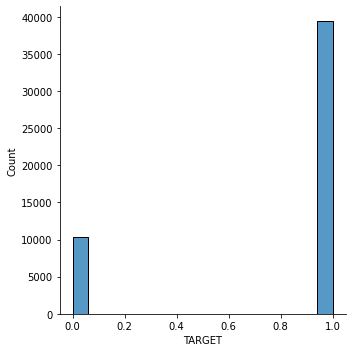

In [73]:
sns.displot( df1_test['TARGET'] )

- Nesses graficos vemos que realmente temos muito mais bons pagadores do que mal pagadores no treino e no teste
 
 
- Isso é um bom sinal, pois em outros casos temos uma diferença muito gritante, isso força a aplicação de tecnicas de redistribuição do dataset

### Categorical attributes

- Nas variáveis categóricas vejo importante vermos as distribuições de cada uma das que conseguimos saber a semântica clara da variável(i.e ESTADO, SITUACAO)

In [76]:
cat_attributes['TARGET'] = num_attributes['TARGET']

<AxesSubplot: xlabel='ESTADO', ylabel='TARGET'>

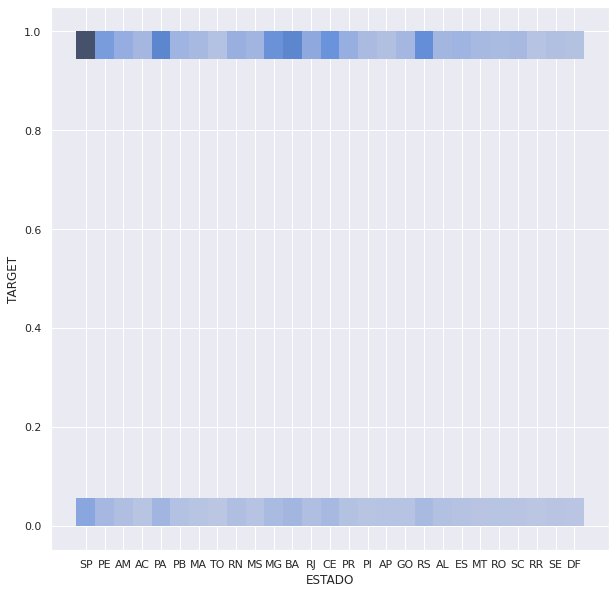

In [110]:
sns.set(rc={'figure.figsize':(10,10)})
sns.histplot( x='ESTADO' , y='TARGET' , data=cat_attributes )


- Com esse gráfico podemos perceber que SP é o estado que temos mais exemplos no nosso dataset, e lá, aparentemente tem a maior relação de bons pagadores/mal pagadores

<AxesSubplot: xlabel='SITUACAO', ylabel='TARGET'>

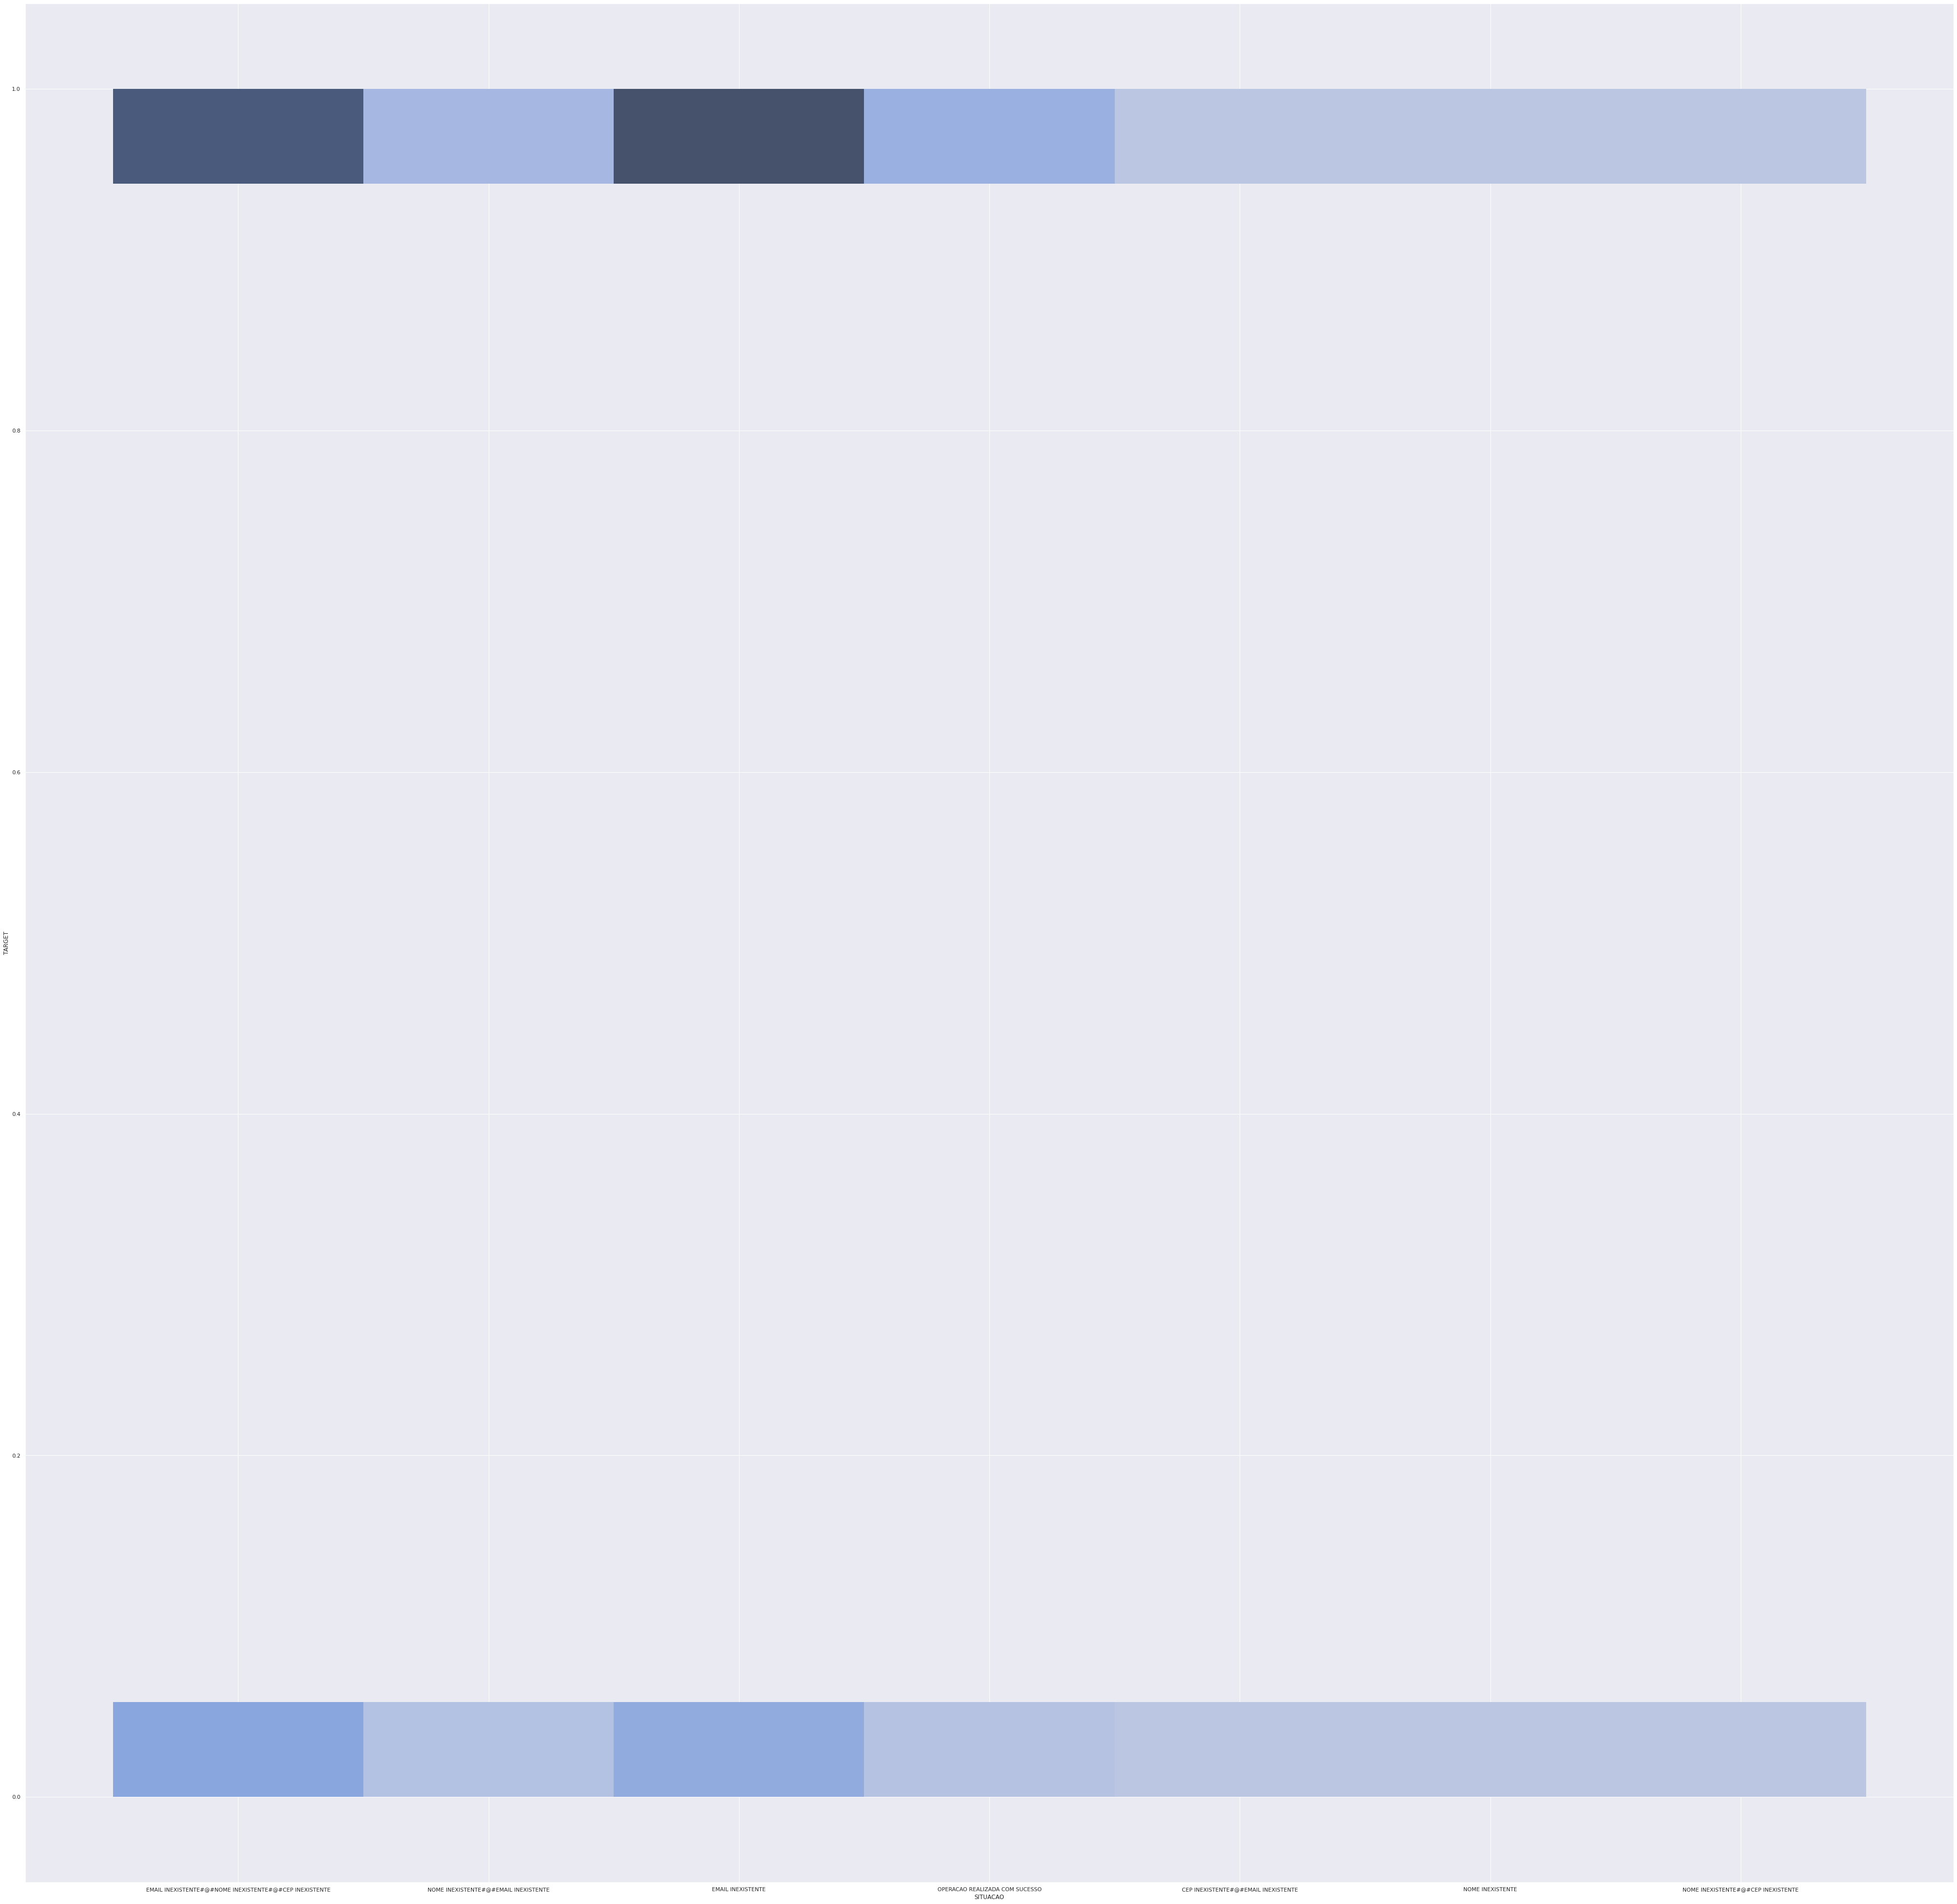

In [111]:
sns.set(rc={'figure.figsize':(70,70)})
sns.histplot( x='SITUACAO' , y='TARGET' , data=cat_attributes )

- Com esse gráfico percebemos que as situações mais comuns, tanto para bons ou mal pagadores é a de Email inexistente e a categoria de EMAIL INEXISTENTE#@#NOME INEXISTENTE#@#CEP INEXISTENTE. 


- Isso pode ser interessante para nós quando estivermos levantando hipóteses sobre o funcionamento da fenômeno e também quando estivermos fazendo a correlação financeira ao final do projeto

# Feature engineering

## Hypotheses mind map

## Final list of hypotheses

## Feature engineering

# Variable filtering

## rows filtering

## Columns selection

# Exploratory data analysis

## Univariate analysis

### Respose variable

### Numerical variable

### Categorical variable 

## Bivariate analysis

## Summary of hypotheses

## Multivariate analysis

### Numerical attributes

### Categorical attributes

# Data preparation

## Normalization


## Rescaling

## Transformation

### Encoding

### Response variable transformation

### Nature transformation

# Feature selection

## Boruta as a feature selector

In [32]:
df_escondido_train = df_raw_train.copy()
df_escondido_test = df_raw_test.copy()


In [33]:
x_train = df_escondido_train.drop(['TARGET', 'REF_DATE'], axis=1)
y_train = df_escondido_train['TARGET']


In [34]:
# from boruta import BorutaPy
# from sklearn.ensemble      import RandomForestRegressor

# # training and test dataset for Boruta
# x_train_n = x_train.values # dropar em relaçao as linhas 
# y_train_n = y_train.values.ravel() # colocar tudo isso dentro de um vetor 

# # # define RandomForestRegressor
# rf = RandomForestRegressor( n_jobs=-1 ) # o n_jobs diz se queremos que ele crie varios processos ao mesmo tempo pra otimizar o que queremos fazer

# # define Boruta
# boruta = BorutaPy( rf, n_estimators='auto', verbose=2, random_state=42 ).fit( x_train, y_train )

### Best features from boruta

### Manual feature selection

# ML models

## Average Model

## Model 1

## Model 2

## Model 3

## Model 4

## Model 5

## Compare model's performance

# Hyperparameter fine tuning

## Random search

## Final model

# Error translation and interpretation

## Business performance

## Total performance

## Machine learning performance